The following document describes the steps and provides instructions for successfully uploading user defined models and doing single and batch prediction on them

Following is the outline of the notebook 

- [Step 1: Prepare the model upload bundle](#Step-1:-Prepare-the-model-upload-bundle)
     - [Step 1.1: Prepare the `__init__.py`](#Step-1.1:-Prepare-the-__init__.py)
     - [Step 1.2: Prepare the `model.py`](#Step-1.2:-Prepare-the-model.py)
     - [Step 1.3: Prepare the `preprocess.py`](#Step-1.3:-Prepare-the-preprocess.py)
     - [Step 1.4: Prepare the `postprocess.py`](#Step-1.4:-Prepare-the-postprocess.py)
     - [Step 1.5: Prepare the `schema.py`](#Step-1.5:-Prepare-the-schema.py)
     - [Step 1.6: Prepare the `loss.py`](#Step-1.6:-Prepare-the-loss.py)
     - [Step 1.7: Prepare the `backbone.py`](#Step-1.7:-Prepare-the-backbone.py-[Optional])
     - [Step 1.8: Prepare the `req.txt`](#Step-1.8:-Prepare-the-reqs.txt)
     - [Step 1.9: Add the model file](#Step-1.9:-Add-the-model-file)
     - [Step 1.10: Code Example](#Step-1.10:-Code-Example)
     
- [Tutorials](#Tutorials)
    - [Helper Functions](#Helper-Functions)
    - [Tutorial: How to download template framework](#Tutorial:-How-to-download-template-framework)
    - [Tutorial: How to check existing namespaces](#Tutorial:-How-to-check-existing-namespaces)
    - [Tutorial: Model Upload API Usecases](#Tutorial:-Model-Upload-API-Usecases)
    - [Tutorial: Single prediction using the uploaded model](#Tutorial:-Single-prediction-using-the-uploaded-model)
    - [Tutorial: Batch prediction using the uploaded model](#Tutorial:-Batch-prediction-using-the-uploaded-model)
    - [Tutorial: How to check the batch prediction status](#Tutorial:-How-to-check-the-batch-prediction-status)

### Step 1: Prepare the model upload bundle

In this section, you will prepare the model upload bundle.

Model upload bundle consists of the following files

<pre>
my_model_bundle/
 |--- __init__.py
 |--- model.py
 |--- preprocess.py
 |--- postprocess.py
 |--- schema.py
 |--- reqs.txt
 |--- model.h5
 |--- loss.py
 |--- backbone.py [ Optional ] 
</pre>

We will look into details of what each file should contain to make everything work.

<div class="alert alert-block alert-info">
<b>NOTE:</b> We need a <zip_files_name>.zip file to upload in the model upload api
</div>

During upload these files should be zipped together at the file level and not the folder level. Meaning when we unzip the zipped file it should **not** contain any folders inside this bundle set. 

Inorder to do get the zip file run the following linux commands

<pre>
`cd my_model_bundle/`
`zip model_upload.zip *.*`
</pre>

### Step 1.1: Prepare the `__init__.py`

This section provides the information on how to create the `__init__.py` file


The `__init__.py` file contains all the model classes imported from the respective python files. This file is used to convert the folder into a package.


*For example* : The file can look like this

<pre>
from .model import <mark style="background-color:yellow;">MyNet</mark> # Replace with your model class name
from .schema import Response
</pre>

### Step 1.2: Prepare the `model.py`

This section provides the information on how to create the `model.py` file

There are three main concerns that should be took care in the `model.py`

**1. Imports in the file** 

All the dependencies should be imported.


*Example*
<pre>
    
import time
import functools

import sklearn
import numpy as np

from logger import AppLogger
from register.register import modelservice
from model.base_models import TensorflowModel
from .preprocess import Preprocess
from .postprocess import Postprocess

logger = AppLogger(__name__).get_logger()


__all__ = [<mark style="background-color:yellow;">'FancyModelX' </mark>] # Replace with your own class name

try:
    import tensorflow as tf
except ImportError:
    pass
    
</pre>

<div class="alert alert-block alert-warning">
<b>NOTE:</b> You can <strong>download the pre-existing templates</strong> API to for a specific framework - problem - architecture combination and extend the class to write your own model class
</div>

Follow this: [Tutorial: How to download template framework](#Tutorial:-How-to-download-template-framework)


**2. Model Class Structure** 

The class structure should be like the following Example

<pre>
@modelservice.register_module(name=<mark style="background-color:yellow;">'fancynetmodelx'</mark>, default=False) # Replace with your own namespace
class <mark style="background-color:yellow;">FancyModelX</mark>(TensorflowModel): # Modify as per your class name 
    def __init__(self, model_path) -> None:
        """
        Function to initialize the class
        
        :param model_path: path to the model artifact
        :param model_path: str
        """
        super().__init__(model_path) 
        self.model_path = model_path
        self.preprocess = Preprocess()
        self.postprocess = Postprocess()
        # ADD ANY ADDITIONAL ATTRIBUTES IF REQUIRED

    def _load_model(self):
        """
        Function to load the model.
        """
        self.model = super().load()
        # The function loads the model using the 
        # loading logic mentioned in the base model template
        # ADD ANY ADDITIONAL LOGIC AS PER YOUR USECASE

    def load(self):
        """
        A Wrapper Function to load the model.
        """
        pass # Your model load logic goes here
        
    def _model_output(self, input_):
        """
        A Wrapper Function to get the model output by calling the predict function.
        
        :param input_: input array for the model prediction
        :param input_: numpy array / tensor array
        """
        pass # Your model output logic goes here

    def predict(self, input_):
        """
        Function to implement the prediction function of the model
        
        :param input_: input array for the model prediction
        :param input_: numpy array / tensor array
        """
        pass # Your prediction logic goes here

    def loss(self, y_pred, y_true): 
        """
        Function to implement the loss function of the model
        
        :param y_pred: predicted target
        :param y_pred: numpy array / tensor array
        :param y_true: actual value / ground truth
        :param y_true: numpy array / tensor array
        """
        pass  # Your loss logic goes here
</pre>

**3. Namespaces**
<div class="alert alert-block alert-warning">
    <b>NOTE:</b> Here the namespace used to register in the model should be <strong>unique</strong>
</div>

You can follow this [Tutorial: How to check existing namespaces](#Tutorial:-How-to-check-existing-namespaces) to check the default and user defined namespaces already present in the database. This will give you an idea how the namespaces should look like or what all namespaces are existing to avoid duplicate namespaces.


This line of code `@modelservice.register_module(name='fancynetmodelx', default=False)` is responsible for registering the model class.

Class is registered with the given namespace `name='fancynetmodelx'`.

Here, `default=False`, the default should be set to `False` so that the class is considered as user-defined. In any case if the there exists a conflict with the namespaces then **Namespace already exist** error is raised. 

And, if the `default=True` the class will not register in the platform. **The access is forbidden for making a user-defined to a default class**

**4. Adding the public object list**

This line of code `__all__ = ['FancyModelX']` ensures that the model class name can be accessed during the import. So the name of the model class should be added to the ` __all__` variable

### Step 1.3: Prepare the `preprocess.py`

This section gives the info on how to create `preprocess.py` file.

The `preprocess.py` contains three concerns

**1. Imports in the file**

*Example*
<pre>

import numpy as np
from PIL import Image
from typing import Union
</pre>


**2. Preprocess function definition**

*Example* 


<pre>
def custom_preprocess_fxn(input_, batch=False) -> Union[list|array]:
    """
    Function for customized preprocessing logic
    
    :param input_: raw input value for preprocessing
    :param input_: numpy array / image buffer 
    :param batch: bool value for switching batch prediction vs single prediction preprocess logic
    :param batch: bool
    
    :returns list | array: list of preprocessed arrays
    
    """
    pass
    # ADD YOUR CODE HERE
    
    
    # ========================== The preprocess logic could look like this
    # if batch:
    #    return np.asarray(
    #        [np.resize(inp, (512, 512, 3)) / 255.0 for inp in input])
    # input = np.resize(input, (512, 512, 3))
    # input = input / 255.0
    # return np.expand_dims(input, 0)
    # ==========================


</pre>

**3. Preprocess Class Structure**

<pre>
class Preprocess:
    def __init__(self) -> None:
        self._preprocess = custom_preprocess_fxn  # Name of the preprocess function goes here

    def __call__(self, input_, batch=False):
        return self._preprocess(input_, batch)
</pre>

This class `Preprocess` is imported in the `model.py`

<div class="alert alert-block alert-warning">
    <b>NOTE:</b> The Namespace used for registering in the respective files should be <strong>all same across classes and unique</strong>
</div>


### Step 1.4: Prepare the `postprocess.py`

This section gives the information on how to create `postprocess.py`

There are there three main concerns in the `postprocess.py`


**1. Imports**

<pre>

import numpy as np
from schema import Response
from typing import Union
</pre>



**2. Function definitions**

<pre>

def custom_postprocess_fxn(output, batch=False, context=None, threshold=0.0) -> Union[list|dict]:
    """
    Function for customized postprocess function
    
    :param output: output array for postprocessing
    :param output: numpy array / tensor array 
    :param batch: bool value to switch for single prediction vs batch prediction
    :param batch: bool
    :param context: This parameter is in progress
    :param context: None
    :param threshold: Value for thresholding the prediction
    :param threshold: float
    
    :returns list[dict] | dict: list if batch else dictionary
    
    Ensure that output dictionary matches the Response model designed in the schema.py
    """
    pass
    # ADD YOUR CODE HERE
    
    
    # ====================================== The logic for post process could look like this
    # def _postprocess(output):
    #    prob = softmax(np.asarray(output[0]))
    #    cls_idx = np.argmax(prob)
    #    conf = prob[cls_idx]
    #    output = {'prediction_class': int(cls_idx),
    #              'confidence': float(conf),
    #              'logits': output[0].tolist() if isinstance(output[0], np.ndarray) else list(output[0]),
    #              'status': 200}
    #    return output
    # if batch:
    #    output_response = []
    #    pred = output
    #    for i in range(len(pred)):
    #        prediction = _postprocess([pred[i]])
    #        output_response.append(prediction)
    #    return output_response
    # else:
    #    return _postprocess(output)
    # ======================================= 
</pre>


**3. Postprocess Class Structure**


<pre>
class Postprocess:
    def __init__(self) -> None:
        self._postprocess_fxn = custom_postprocess_fxn # Name of the customized postprocess function goes here

    def __call__(self, input_, batch=False, context=None):
        return self._postprocess_fxn(input_, batch, context)

</pre>


This class `Postprocess` is imported in the `model.py`

<div class="alert alert-block alert-warning">
    <b>NOTE:</b> The Namespace used for registering in the respective files should be <strong>all same across classes and unique</strong>
</div>

### Step 1.5: Prepare the `schema.py`

This section gives the information on how to create `schema.py`

There are two main concerns in the `schema.py`


**1. Imports**
<pre>
from pydantic import BaseModel
from register import outschema
</pre>

We need to import the `outschema` for registry


**2. Response class structure**

<pre>
@outschema.register_module(<mark style="background-color:yellow;">'fancynetmodelx'</mark>, default=False) # Replace with your own namespace
class Response(BaseModel):
    prediction_class: int
    confidence: float
    logits: list

</pre>

This line of code `@outschema.register_module('fancynetmodelx', default=False)` registers the `Reponse` class. The response class is used define the schema for model prediction

<div class="alert alert-block alert-warning">
    <b>NOTE:</b> The Namespace used for registering in the respective files should be <strong>all same across classes and unique</strong>
</div>

### Step 1.6: Prepare the `loss.py`

This section gives the information on how to create `loss.py`

The loss function is responsible for calculating the loss metrics whenever a batch prediction happens

You can define the loss function logic inside a class or function inside  `loss.py` and implement in the `model.py` file, in the loss class method of the model

<pre>

class MyLoss:
    def __init__(self):
        pass # your logic here
    
    def loss_function(self, y_pred, y_true) -> float:
        """
        Function to calculate loss 
        
        :param y_pred: predicted value
        :param y_pred: list / array
        :param y_true: actual value
        :param y_true: list / array
        
        :returns float
        """
        pass # Your code here

</pre>

### Step 1.7: Prepare the `backbone.py` [Optional]

This section gives the information on how to create the `backbone.py`

The `backbone.py` is required in cases where the model architecture is defined and is used in the `model.py` file. Inside the `load` function we need to create an instance of the model architecture and send the instance to the inherited `load` function so that the weights are loaded


### Step 1.8: Prepare the `reqs.txt`

This section gives the information on how to create `reqs.txt` file

The requirements text file should contain all the packages that is used across all the files

*Example*

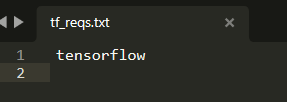

### Step 1.9: Add the model file


The model weights file should be added in the directory

It can be one of the following

1. `model.h5`
2. `model.pt`
3. `model.onnx`
4. `tensorflow_checkpoints`


### 
<div class="alert alert-block alert-info">
    <b>NOTE:</b> There are special Use cases with respect to how the model upload API works with different set of combinations. 
</div>

To know more about this check this section [Tutorials: Model Upload API Usecases](#Tutorial:-Model-Upload-API-Usecases)

### Step 1.10: Code Example

**1. `__init__.py`**



<pre>

from .model import MyNet
from .schema import Response

</pre>

**2. model.py**

<pre>
import numpy as np

from logger import AppLogger
from register.register import modelservice
from core.engine.base_models import TensorflowModel
from .preprocess import Preprocess
from .postprocess import Postprocess

logger = AppLogger(__name__).get_logger()

__all__ = ['MyNet']

try:
    import tensorflow as tf
except ImportError:
    pass


@modelservice.register_module(name='MyNet', default=False)
class MyNet(TensorflowModel):
    def __init__(self, model_path) -> None:
        super().__init__(model_path)
        self.model_path = model_path
        self.preprocess = Preprocess()
        self.preprocess(np.zeros((100, 100, 3)), False)
        self.postprocess = Postprocess()
        self.num_classes = 1
        self.class_mapping = {1: 'Positive', 0: 'Negative'}

    def _load_model(self):
        self.model = super().load()

    def load(self):
        self._load_model()

    def _model_output(self, input):
        y_pred = self.model.predict(input)
        return y_pred

    def predict(self, input):
        y_pred = self._model_output(input)
        return y_pred

    def loss(self, y_pred, gts):
        if not any(isinstance(el, list) for el in gts):
            gts = np.asarray(list(map(lambda x: int(x), gts)))
        # Apply loss function
        _loss_function = tf.keras.losses.CategoricalCrossentropy(
            reduction='none')
        gts_encoder = np.zeros((gts.size, self.num_classes))
        gts_encoder[np.arange(gts.size), gts] = 1
        losses = _loss_function(y_pred, gts_encoder).numpy()

        return losses.tolist()

</pre>

**3. preprocess.py**

<pre>
import numpy as np


def custom_preprocess_fxn(input, batch=False):
    if batch:
        return np.asarray(
            [np.resize(inp, (64, 64, 3)) / 255.0 for inp in input])
    input = np.resize(input, (64, 64, 3)) / 255.0
    return np.expand_dims(input, 0)


class Preprocess:
    def __init__(self) -> None:
        self._preprocess = custom_preprocess_fxn

    def __call__(self, input, batch=False):
        if batch:
            return np.asarray(
                [np.resize(inp, (64, 64, 3)) / 255.0 for inp in input])
        input = np.resize(input, (64, 64, 3)) / 255.0
        return np.expand_dims(input, 0)

</pre>

**4. postprocess.py**


<pre>
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


def custom_postprocess_fxn(model_output, batch=False, context=None, threshold=0.0):
    def _postprocess(output):
        prob = softmax(np.array(output[0]))
        confidence = output[0][0]
        prediction_class = 0
        if threshold > 0:
            prediction_class = 1 if confidence > threshold else 0
        else:
            prediction_class = int(confidence)

        output = {'prediction_class': prediction_class,
                  'confidence': float(confidence),
                  'logits': prob.tolist(),
                  'status': 200}
        return output
    if batch:
        return [_postprocess([val]) for idx, val in enumerate(model_output)]
    else:
        return _postprocess(model_output)


class Postprocess:
    def __init__(self) -> None:
        self._postprocess_fxn = custom_postprocess_fxn

    def __call__(self, input, batch=False, context=None):
        return self._postprocess_fxn(input, batch, context)
</pre>

**5. schema.py**

<pre>
from pydantic import BaseModel

from register import outschema


@outschema.register_module('MyNet', default=False)
class Response(BaseModel):
    prediction_class: int
    confidence: float
    logits: list

</pre>

**6.reqs.txt**

<pre>
tensorflow-cpu
</pre>

### Tutorials 

This section goes over the details of using the **model upload API**

#### Helper Functions

Execute this section to bring the helper functions on the memory for further code execution of the API's.

In [ ]:
import requests
import pymongo
import pprint

In [ ]:
# Modify the config parameters as per convenience
config = {
    'mongodb_username': '',  # Add username
    'mongodb_userpass': '',  # Add password
    'mongodb_host': 'localhost',
    'mongodb_port': '27017',
}


def send_request(payload, endpoint, request_type, params=None):
    """Function to send the request to the model post or get type"""
    # set headers to api
    headers = {
        'accept': 'application/json', 
        'Content-Type': 'application/json',
    }
    
    # Post the data on the api
    if request_type == 'post':
        if params:
            response = requests.post(endpoint, params=params, json=payload, headers=headers)
        else:
            response = requests.post(endpoint, json=payload, headers=headers)
    else:
        if params:
            response = requests.get(endpoint, params=params, json=payload, headers=headers)
        else:
            response = requests.get(endpoint, json=payload, headers=headers)
    
    print("status code: ", response.status_code)
    print("json response: ", response.json())


def get_validation_progress():
    """This function gets the status of progress of validation run."""
    user_name = config['mongodb_username']
    user_pass = config['mongodb_userpass']
    host = config['mongodb_host']
    port = config['mongodb_port']
    client = pymongo.MongoClient(f"mongodb://{user_name}:{user_pass}@{host}:{port}")
    db = client['Frontend']
    collection = db['ValidationSummary']
    for doc in collection.find({'batch_job_id': batch_job_id}, {'progress':1}):
        print('progress: ', doc['progress'])
        

def fetch_model_card_from_db(model_id):
    """This function fetches the model card from the mongo database."""
    user_name = config['mongodb_username']
    user_pass = config['mongodb_userpass']
    host = config['mongodb_host']
    port = config['mongodb_port']
    client = pymongo.MongoClient(f"mongodb://{user_name}:{user_pass}@{host}:{port}")
    db = client['Model']
    collection = db['ModelCard']
    
    for doc in collection.find({'model_id': model_id}):
        pprint.pprint(doc)

#### Tutorial: How to download template framework

In [ ]:
# Download pre-existing template

host_name = "http://127.0.0.1" # put here the host name
port_number = "8015" # put here the port number 
endpoint = "manage/models/template/zip" # put here the endpoint
params = {
    "framework": "tensorflow", # put here the framework of your choice
    "problem": "classification", # put here the problem of your choice
    "architecture": "resnet50" # put here the architecture of your choice
}
url = f"{host_name}:{port_number}/{endpoint}"
payload = {}
headers = {
        'accept': 'application/json', 
        'Content-Type': 'application/json'
}
resp = requests.post(url, json=payload, headers=headers, params=params) 
print(resp.status_code)

In [ ]:
# Write the received binary stream into a zip file
with open('template.zip', 'wb') as f:
    f.write(resp.content)

In [ ]:
# unzip the template file using the linux command
!unzip template.zip

#### Tutorial: How to check existing namespaces

In [ ]:
# Check Existing NameSpaces

host_name = "http://127.0.0.1" # put here the host name
port_number = "8015" # put here the port number 
endpoint = "manage/models/namespaces" # put here the endpoint

url = f"{host_name}:{port_number}/{endpoint}"
payload = {}
headers = {
        'accept': 'application/json', 
        'Content-Type': 'application/json'
}
resp = requests.get(url, json=payload, headers=headers)
print(resp.status_code)
print(resp.json())

#### Tutorial: Model Upload API Usecases

In [15]:
from ipywidgets import FileUpload
from IPython.display import display
import os

**&#9654; Case 1: Update prebuilt model with custom model layers**

Case when we update the model architecture and add a new model to the database. 
In this case we require.

- The `model.py` file with namespace registered on the class. Ex: `@modelservice.register_module(name='resnet50x_test', default=False)`, the default flag should be set to False in order to register it as a user-defined module.
- The `schema.py` file should contain the same namespace registered to the model class. Ex: `@outschema.register_module('resnet50x_test', default=False)`
- The Namespaces should be unique else it will raise a <strong>Namespace is already present exception</strong>

 <b>Parameter Combination Example</b>
 <pre>
 *Type: Classification*
 *Framework: tensorflow*
 *Architecture: resnet*
 *customize: True*
 </pre>

In [13]:
# Step 1: Upload the zip folder to the platform
upload = FileUpload(accept='.zip', multiple=False)
display(upload)

FileUpload(value={}, accept='.zip', description='Upload')

In [ ]:
# Step 2: Save the uploaded zip file
zip_file_path = os.getcwd() + '/user_model.zip'
with open(zip_file_path, 'wb') as output_file: 
    for uploaded_filename in upload.value:
        content = upload.value[uploaded_filename]['content']   
        output_file.write(content) 
print(zip_file_path)

In [ ]:
# Step 3: Send the zip file to the model zip upload api
payload = {}
params = {
    "framework": "tensorflow", # put the name of the framework here
    "problem": "multiclass-classification",  # put the problem with respect to your choice and the combination
    "architecture": "resnet50x_test" # put the name of the architecture
}

host_name = 'http://127.0.0.1' # put the host name here
port_number = '8015' # put the port number here
endpoint = 'manage/models/upload/zip' # put the endpoint here
url = f"{host_name}:{port_number}/{endpoint}" 

files = {'model_zip': open(zip_file_path, 'rb')} # reads the model zip file
resp = requests.post(url, files=files, params=params) # posts the request
print(resp.json())

######
# Response
#   - model_id : str
#   - model_zip_path : str
######

In [ ]:
# STEP 4: Update the ModelCard in the database

# Model card - # Note the fields from UI are different from the fields in the figma 
# enter the details of the model here.
payload = {
  "model_architecture": "resnet50x_test",
  "model_id": "61e80621b9d1e809e220d52a", # put the model id received from the upload api here
  "model_framework": "tensorflow",
  "framework_version": "1",
  "reqs": "tf_reqs.txt",
  "model_version": "1",
  "model_url": "resnet-50.h5",
  "model_size": "150",
  "class_mappings": { "0" : "No DR", "1" : "Mild", "2" : "Moderate", "3" : "Severe", "4" : "Proliferate DR" },
  "problem": "multiclass-classification",
  "category": "EyeScan",
  "tags": [
    "retinopathy"
  ],
  "model_train_specs": {},
  "model_vendor_id": "vendor1",
  "created_timestamp": "",
  "input_shape": [320, 320]
}

params = {
    # use the model zip path recieved from manage/models/upload/zip
    'model_zip_path': 'user_models/multiclass-classification/tensorflow/model_61e80621b9d1e809e220d52a', 
    'only_model': False # This field is inverse to the customize field value mentioned in the github wiki
}

host_name = 'http://127.0.0.1' # put the host name here
port_number = '8015' # put the port number here
endpoint = "manage/models/db/add" # put the end point here
url = f"{host_name}:{port_number}/{endpoint}"

send_request(payload, url, "post", params)
######
# Response
#   - status : str
######

In [ ]:
# Step 5: Check if the model card is added to the database
fetch_model_card_from_db('61e80621b9d1e809e220d52a') # input is model id

**&#9654; Case 2: Update prebuilt model with only new model weights file.**

Case where we need to update only the model


In this case we require

- The model weights file (.h5) or (.hdf5)
- The `model.py` file will be ignored if passed.
- The given namespace should be same as the architecture name.

 <b>Parameter Combination Example</b>
 <pre>
 *Type: Classification*
 *Framework: tensorflow*
 *Architecture: resnet*
 *customize: False*
 </pre>

In [19]:
# Step 1: Upload the zip folder to the platform
upload = FileUpload(accept='.zip', multiple=False)
display(upload)

FileUpload(value={}, accept='.zip', description='Upload')

In [ ]:
# Step 2: Save the uploaded zip file
zip_file_path = os.getcwd() + '/user_model.zip'
with open(zip_file_path, 'wb') as output_file: 
    for uploaded_filename in upload.value:
        content = upload.value[uploaded_filename]['content']   
        output_file.write(content) 
print(zip_file_path)

In [ ]:
# Step 3: Send the zip file to the model zip upload api
payload = {}
params = {
    "framework": "tensorflow", # put the name of the framework here
    "problem": "multiclass-classification",  # put the problem with respect to your choice and the combination
    "architecture": "resnet50x_test" # put the name of the architecture
}

host_name = 'http://127.0.0.1' # put the host name here
port_number = '8015' # put the port number here
endpoint = 'manage/models/upload/zip' # put the endpoint here
url = f"{host_name}:{port_number}/{endpoint}" 

files = {'model_zip': open(zip_file_path, 'rb')} # reads the model zip file
resp = requests.post(url, files=files, params=params) # posts the request
print(resp.json())

######
# Response
#   - model_id : str
#   - model_zip_path : str
######

In [ ]:
# STEP 4: Update the ModelCard in the database

# Model card - # Note the fields from UI are different from the fields in the figma 
# enter the details of the model here.
payload = {
  "model_architecture": "resnet50x_test",
  "model_id": "61e80621b9d1e809e220d52a", # put the model id received from the upload api here
  "model_framework": "tensorflow",
  "framework_version": "1",
  "reqs": "tf_reqs.txt",
  "model_version": "1",
  "model_url": "resnet-50.h5",
  "model_size": "150",
  "class_mappings": { "0" : "No DR", "1" : "Mild", "2" : "Moderate", "3" : "Severe", "4" : "Proliferate DR" },
  "problem": "multiclass-classification",
  "category": "EyeScan",
  "tags": [
    "retinopathy"
  ],
  "model_train_specs": {},
  "model_vendor_id": "vendor1",
  "created_timestamp": "",
  "input_shape": [320, 320]
}

params = {
    # use the model zip path recieved from manage/models/upload/zip
    'model_zip_path': 'user_models/multiclass-classification/tensorflow/model_61e819ad17ce37cfc59df612', 
    'only_model': True # This field is inverse to the customize field value mentioned in the github wiki
}


host_name = 'http://127.0.0.1' # put the host name here
port_number = '8015' # put the port number here
endpoint = "manage/models/db/add" # put the end point here
url = f"{host_name}:{port_number}/{endpoint}"

send_request(payload, url, "post", params)
######
# Response
#   - status : str
######

In [ ]:
# Step 5: Check if the model card is added to the database
fetch_model_card_from_db('61e80621b9d1e809e220d52a') # input is model id

**&#9654; Case 3: Upload new architecture from scratch (FancyNet)**

Case when new architecture is uploaded

In this case we require

- In case for architecture is None, customize is automatically True, only_model will be set to false
- The `model.py` file will be checked for namespace and uniqueness (FancyNet). Ex: `@modelservice.register_module(name='fancymodelx', default=False)`
- `schema.py` should contain the same namespace as the namespace used for registering the `model.py` Ex: `@outschema.register_module('fancymodelx', default=False)`
- Here, FancyNet simply represents any of the modelNET that the user would define.

<b>Parameter Combination Example</b>
<pre>
*Type: Classification*
*Framework: tensorflow*
*Architecture: None*
*customize: True*
</pre>

In [ ]:
# Step 1: Upload the zip folder to the platform
upload = FileUpload(accept='.zip', multiple=False)
display(upload)

In [ ]:
# Step 2: Save the uploaded zip file
zip_file_path = os.getcwd() + '/user_model.zip'
with open(zip_file_path, 'wb') as output_file: 
    for uploaded_filename in upload.value:
        content = upload.value[uploaded_filename]['content']   
        output_file.write(content) 
print(zip_file_path)

In [ ]:
# Step 3: Send the zip file to the model zip upload api
payload = {}

params = {
    "framework": "tensorflow", # put the name of the framework here
    "problem": "multiclass-classification", # put the problem with respect to your choice and the combination
    "architecture": "fancynet_modelx"  # put the name of the architecture
}

host_name = 'http://127.0.0.1' # put the host name here
port_number = '8015' # put the port number here
endpoint = 'manage/models/upload/zip' # put the endpoint here
url = f"{host_name}:{port_number}/{endpoint}" 

files = {'model_zip': open(zip_file_path, 'rb')} # reads the model zip file
resp = requests.post(url, files=files, params=params) # posts the request
print(resp.json())

######
# Response
#   - model_id : str
#   - model_zip_path : str
######

In [ ]:
# STEP 4: Update the ModelCard in the database

# Model card - # Note the fields from UI are different from the fields in the figma 
# enter the details of the model here.
payload = {
  "model_architecture": "",
  "model_id": "61e80621b9d1e809e220d52a", # put the model id received from the upload api here
  "model_framework": "tensorflow",
  "framework_version": "1",
  "reqs": "tf_reqs.txt",
  "model_version": "1",
  "model_url": "resnet-50.h5",
  "model_size": "150",
  "class_mappings": { "0" : "No DR", "1" : "Mild", "2" : "Moderate", "3" : "Severe", "4" : "Proliferate DR" },
  "problem": "multiclass-classification",
  "category": "EyeScan",
  "tags": [
    "retinopathy"
  ],
  "model_train_specs": {},
  "model_vendor_id": "vendor1",
  "created_timestamp": "",
  "input_shape": [320, 320]
}

params = {
    # use the model zip path recieved from manage/models/upload/zip
    'model_zip_path': 'user_models/multiclass-classification/tensorflow/model_61e819ad17ce37cfc59df612', 
    'only_model': False # This field is inverse to the customize field value mentioned in the github wiki
}


host_name = 'http://127.0.0.1' # put the host name here
port_number = '8015' # put the port number here
endpoint = "manage/models/db/add" # put the end point here
url = f"{host_name}:{port_number}/{endpoint}"

send_request(payload, url, "post", params)
######
# Response
#   - status : str
######

In [ ]:
# Step 5: Check if the model card is added to the database
fetch_model_card_from_db('61e80621b9d1e809e220d52a') # input is model id

**&#9654; Case 4: Upload the newly added architecture with new model architecture**

Case when newly added architecture is used for new model

In this case we require

- customise is true hence model file and out schema will checked for namespace uniqueness (namespace should not match FancyNet or default namespaces)


<b>Parameter Combination Example</b>
<pre>
*Type: Classification*
*Framework: tensorflow*
*Architecture: FancyNet*
*customize: True*
</pre>

In [ ]:
# Step 1: Upload the zip folder to the platform
upload = FileUpload(accept='.zip', multiple=False)
display(upload)

In [ ]:
# Step 2: Save the uploaded zip file
zip_file_path = os.getcwd() + '/user_model.zip'
with open(zip_file_path, 'wb') as output_file: 
    for uploaded_filename in upload.value:
        content = upload.value[uploaded_filename]['content']   
        output_file.write(content) 
print(zip_file_path)

In [ ]:
# Step 3: Send the zip file to the model zip upload api
payload = {}

params = {
    "framework": "tensorflow", # put the name of the framework here
    "problem": "multiclass-classification", # put the problem with respect to your choice and the combination
    "architecture": "fancynet_modelx"  # put the name of the architecture
}

host_name = 'http://127.0.0.1' # put the host name here
port_number = '8015' # put the port number here
endpoint = 'manage/models/upload/zip' # put the endpoint here
url = f"{host_name}:{port_number}/{endpoint}" 

files = {'model_zip': open(zip_file_path, 'rb')} # reads the model zip file
resp = requests.post(url, files=files, params=params) # posts the request
print(resp.json())

######
# Response
#   - model_id : str
#   - model_zip_path : str
######

In [ ]:
# STEP 4: Update the ModelCard in the database

# Model card - # Note the fields from UI are different from the fields in the figma 
# enter the details of the model here.
payload = {
  "model_architecture": "fancynet_modelx",
  "model_id": "61e80621b9d1e809e220d52a", # put the model id received from the upload api here
  "model_framework": "tensorflow",
  "framework_version": "1",
  "reqs": "tf_reqs.txt",
  "model_version": "1",
  "model_url": "resnet-50.h5",
  "model_size": "150",
  "class_mappings": { "0" : "No DR", "1" : "Mild", "2" : "Moderate", "3" : "Severe", "4" : "Proliferate DR" },
  "problem": "multiclass-classification",
  "category": "EyeScan",
  "tags": [
    "retinopathy"
  ],
  "model_train_specs": {},
  "model_vendor_id": "vendor1",
  "created_timestamp": "",
  "input_shape": [320, 320]
}

params = {
    # use the model zip path recieved from manage/models/upload/zip
    'model_zip_path': 'user_models/multiclass-classification/tensorflow/model_61e819ad17ce37cfc59df612', 
    'only_model': False # This field is inverse to the customize field value mentioned in the github wiki
}


host_name = 'http://127.0.0.1' # put the host name here
port_number = '8015' # put the port number here
endpoint = "manage/models/db/add" # put the end point here
url = f"{host_name}:{port_number}/{endpoint}"

send_request(payload, url, "post", params)
######
# Response
#   - status : str
######

In [ ]:
# Step 5: Check if the model card is added to the database
fetch_model_card_from_db('61e80621b9d1e809e220d52a') # input is model id

**&#9654; Case 5: Update FancyNet with new model file only**

Case when only model file is uploaded when the model architecture is already existing

In this case we require

- As customise is false hence we require to ignore `model.py` file upload and only weight file will be added
- Namespace will be same as FancyNet architecture


<b>Parameter Combination Example</b>
<pre>
*Type: Classification*
*Framework: tensorflow*
*Architecture: FancyNet*
*customize: False*
</pre>

In [ ]:
# Step 1: Upload the zip folder to the platform
upload = FileUpload(accept='.zip', multiple=False)
display(upload)

In [ ]:
# Step 2: Save the uploaded zip file
zip_file_path = os.getcwd() + '/user_model.zip'
with open(zip_file_path, 'wb') as output_file: 
    for uploaded_filename in upload.value:
        content = upload.value[uploaded_filename]['content']   
        output_file.write(content) 
print(zip_file_path)

In [ ]:
# Step 3: Send the zip file to the model zip upload api
payload = {}

params = {
    "framework": "tensorflow", # put the name of the framework here
    "problem": "multiclass-classification", # put the problem with respect to your choice and the combination
    "architecture": "fancynet_modelx"  # put the name of the architecture
}

host_name = 'http://127.0.0.1' # put the host name here
port_number = '8015' # put the port number here
endpoint = 'manage/models/upload/zip' # put the endpoint here
url = f"{host_name}:{port_number}/{endpoint}" 

files = {'model_zip': open(zip_file_path, 'rb')} # reads the model zip file
resp = requests.post(url, files=files, params=params) # posts the request
print(resp.json())

######
# Response
#   - model_id : str
#   - model_zip_path : str
######

In [ ]:
# STEP 4: Update the ModelCard in the database

# Model card - # Note the fields from UI are different from the fields in the figma 
# enter the details of the model here.
payload = {
  "model_architecture": "fancynet_modelx",
  "model_id": "61e80621b9d1e809e220d52a", # put the model id received from the upload api here
  "model_framework": "tensorflow",
  "framework_version": "1",
  "reqs": "tf_reqs.txt",
  "model_version": "1",
  "model_url": "resnet-50.h5",
  "model_size": "150",
  "class_mappings": { "0" : "No DR", "1" : "Mild", "2" : "Moderate", "3" : "Severe", "4" : "Proliferate DR" },
  "problem": "multiclass-classification",
  "category": "EyeScan",
  "tags": [
    "retinopathy"
  ],
  "model_train_specs": {},
  "model_vendor_id": "vendor1",
  "created_timestamp": "",
  "input_shape": [320, 320]
}

params = {
    # use the model zip path recieved from manage/models/upload/zip
    'model_zip_path': 'user_models/multiclass-classification/tensorflow/model_61e819ad17ce37cfc59df612', 
    'only_model': True # This field is inverse to the customize field value mentioned in the github wiki
}


host_name = 'http://127.0.0.1' # put the host name here
port_number = '8015' # put the port number here
endpoint = "manage/models/db/add" # put the end point here
url = f"{host_name}:{port_number}/{endpoint}"

send_request(payload, url, "post", params)
######
# Response
#   - status : str
######

In [ ]:
# Step 5: Check if the model card is added to the database
fetch_model_card_from_db('61e80621b9d1e809e220d52a') # input is model id

#### Tutorial: Single prediction using the uploaded model

In [ ]:
hostname = 'http://127.0.0.1'  # Enter the URL where the model is deployed
port_num = '8000' # Enter the port number
endpoint = 'prediction' # Enter the prediction endpoint
deploy_id = '' # id of the deployment 
dataset_id = '' # id of the dataset 
image_id = ''  # Id of the image referring to image in the Data.Image collection
user_transformations = {} # Specific transformation to apply on the image


# build the URL
url = '{}:{}/{}/{}'.format(hostname, port_num, endpoint, deploy_id)

# input to the api
json_input = {
    "image_id": image_id, 
    "deploy_id": deploy_id,
    "dataset_id": dataset_id,
    "user_transformations": user_transformations
}

# set headers to api
headers = {
    'accept': 'application/json', 
    'Content-Type': 'application/json',
}

# Post the data on the api
response = requests.post(url, json=json_input, headers=headers)


# Print the response
if response.status_code == 200:
    print(response.content)
    
# """
# Response
# ---------
# prediction_class: An integer value stating the predicted class for the classification
# confidence: A float value stating the confidence of the model for prediction
# time_taken: A float value stating the amount of time took for single image prediction
# status: An integer value stating the api execution status of the api
# prediction_class_mappings: For single predictions, we also need to return human readable class mapping.

# """
## Note: Class wise logits, losses and confidence must return. 

#### Tutorial: Batch prediction using the uploaded model

In [ ]:
hostname = 'http://127.0.0.1'  # Enter the URL where the model is deployed
port_num = '8000' # Enter the port number
endpoint = 'batch/prediction' # Enter the prediction endpoint
deploy_id = ''  # id of the deployed model
dataset_id = ""  # Id of the dataset from which the set of images to chose from
user_transformations = {}  # User transformations to apply on the image
number_of_images = 64  # Total number of images to subset from the dataset
batch_size = 16  # Size of the batch on which data should be splitted for prediction

# build the URL
url = '{}:{}/{}'.format(hostname, port_num, endpoint)

# input to the api
json_input = {
  "dataset_id": dataset_id,
  "user_transformations": user_transformations,  
  "deploy_id": deploy_id, 
  "n_images": number_of_images, 
  "batch_size": batch_size
}


# set headers to api
headers = headers = {
    'accept': 'application/json', 
    'Content-Type': 'application/json',
}

# Post the data on the api
response = requests.post(url, json=json_input, headers=headers)


# Post the data on the api
if response.status_code == 200:
    print(response.content)

# """
# Response
# ---------
# batch_job_id: Alphanumeric value as a reference to the background running batch prediction
# status: A String value with the api status description
# code: An integer value for the status code

# """



Once You have submitted the batch prediction job, you need to check the status of the batch prediction
Follow this tutorial to on how to check the batch prediction status [Tutorial: How to check the batch prediction status](#Tutorial:-How-to-check-the-batch-prediction-status)

#### Tutorial: How to check the batch prediction status

In [ ]:
hostname = 'http://127.0.0.1'  # Enter the URL where the model is deployed
port_num = '8000' # Enter the port number
endpoint = 'batch/status' # Enter the prediction endpoint
batch_job_id = "" # Id of the batch job received from the batch prediction api


# build the URL
url = '{}:{}/{}'.format(hostname, port_num, endpoint)

# input to the api
json_input = {
  "batch_job_id": batch_job_id
}


# set headers to api
headers = headers = {
    'accept': 'application/json', 
    'Content-Type': 'application/json',
}

# Post the data on the api
response = requests.post(url, json=json_input, headers=headers)


# Post the data on the api
print(response.status_code)
if response.status_code == 200:
    print(response.content)

# """
# Response
# ---------
# batch_job_id: Alphanumeric value as a reference to the background running batch prediction
# status: A dictionary stating the number of batches done
# -- batches_done: Number of batches completed
# -- total_batches: Total number of batches
# -- status: A string value stating the status of the api
# -- batches_failed: Number of batches failed
# -- total_images: Total number of batches

# """
